In [1]:
#**********************************************************************
#Slide-52: Fitting an Autoregressive Model
#**********************************************************************

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import numpy as np


In [2]:
path = 'datasets/airline-passengers.csv'

Coefficients: [-0.19542429  0.78969399 -0.25337862]


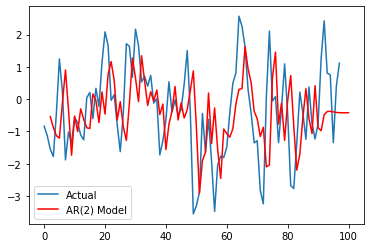

In [3]:
arparams = np.array([.75, -.25])

ar = np.r_[1, -arparams]

arma_process = sm.tsa.ArmaProcess(ar,ma=None)

x = arma_process.generate_sample(100)

train, test = x[1:len(x)-7], x[len(x)-7:]
model = AutoReg(train, lags=2)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
x_ar = model_fit.predict(start=0, end=len(x), dynamic=False)
plt.plot(x[2:len(x)],label='Actual')
plt.plot(x_ar, color='red',label='AR(2) Model')
plt.legend(loc='best')